# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

Part 1.1
The below code generates 5000 datapoints following a gaussian distribution, using mu = 2 and sigma = 0.125


In [2]:
import numpy as np

mu = 2
sigma = 0.125 #skal denne være varians eller standardafvigelse? Spørg de andre
n = 5000

ran = np.random.normal(mu, sigma, n)
# print(len(ran), ran.mean(), ran) #Kan slettes, bruges som tjek

This code will generate two arrays. The first containg the count, and the second containing the binning edges.

In [3]:
hist, bin_edges = np.histogram(ran, bins = 10)

When using the numpy histogram, the output of the function will be two arrays. The first array shows the number of datapoints in each of the 10 bins. This means that the first array has a length of 10.
The second array shows the bin edges. This means that the first number in the array is the lower edge of the first bin. The second number in the second array is the split between the first and second bin, and so forth. There are 11 numbers in the second array because the last number in the array gives the upper edge of the last bin. This is also the reason why the length of the array containing the bin edges will always be 1 larger than the array showing how may data points is placed in each bin.
In order to plot the binned data, the following code is used.

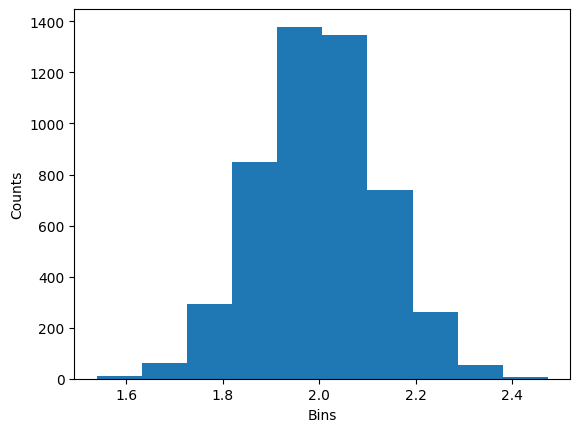

(array([  12.,   60.,  293.,  849., 1379., 1348.,  740.,  260.,   54.,
          5.]), array([1.53942633, 1.63292174, 1.72641716, 1.81991257, 1.91340799,
       2.0069034 , 2.10039881, 2.19389423, 2.28738964, 2.38088505,
       2.47438047]), <BarContainer object of 10 artists>)


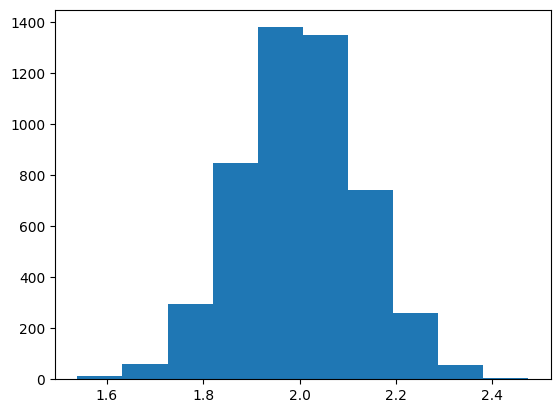

In [4]:
from matplotlib import pyplot as plt

# Calculate bin centers #Denne kode er lavet af chatgpt, men hvad er forskellen mellem det plot som den laver og det plot den sidste linje laver?
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a bar chart
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), align='center')

# Label the axes
plt.xlabel('Bins')
plt.ylabel('Counts')

# Show the plot
plt.show()

print(plt.hist(ran))

In order to deal with the different array lengths we find the bin centers of each of the bins, and i that way the bin_centers array will be 10 long as well as the count array.

However, you are also able to deal automatically with the binning problem by plotting with matplotlib.


Part 1.2
The following code is used to generate 5000 datapoints from a poisson distribution using lambda = 10. 

After the minimum and maximum value of the data points are found.

The minimum is 1, and the maximum is 23.


In [5]:
import numpy as np

lambd = 10
n = 5000

#Creates seed
np.random.seed(6)

#Generates numbers
pois = np.random.poisson(lambd, n)

#Finds min value and max value of the random numbers
minimum = np.min(pois)
maximum = np.max(pois)

print("Minimum value is: ", minimum)
print("Maximum value is: ", maximum)

Minimum value is:  1
Maximum value is:  23


The code below creates a vector containing all of the datapoints, and calculates the sum over bin counts.

In [6]:
# Create a vector 𝑣 with bins starting from the minimum and ending at the maximum
v = np.arange(minimum, maximum +2) #+2 to ensure that the maximum is binned.

hist, edges = np.histogram(pois, bins = v)
print(hist, edges)
sum_counts = np.sum(hist)

print("The sum over bin counts = ", sum_counts)

[  1  13  38  80 184 313 410 580 664 632 522 483 389 277 168 106  75  35
  14   8   6   1   1] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
The sum over bin counts =  5000


By using a vector to define the bins, np.histogram takes the first number as inclusive, however the last element is exclusive. This means that you have to add 2 to the maximum to ensure that the maximum value falls into a bin. The first element of the binning vector is therefore the first number in the array of binning edges, which is also the minimum of the poisson distribution. The last element of the binning vector is the maximum +2, which is 25. The last element of the binning edges is then 24 since it is exclusive the last element of the binning vector. The maximum is 23, which will fall into the last bin that goes up to 24.
The next code plots the data.

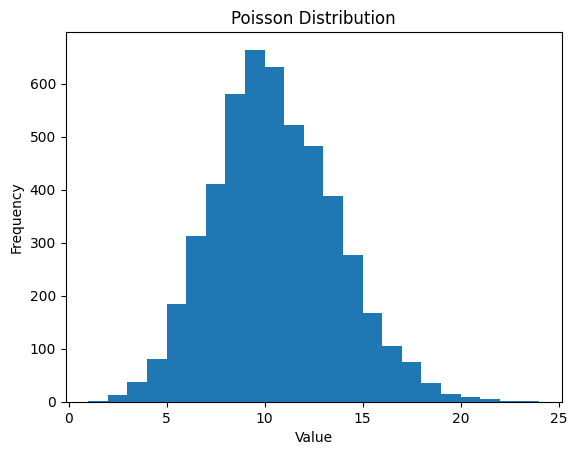

In [7]:
from matplotlib import pyplot as plt

plt.bar(edges[:-1], hist, width=1.0, align='edge')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Poisson Distribution')

# Show the plot
plt.show()

Part 1.3
To find the value of p, the hint in the question gives us the following formula ⟨𝑘⟩=𝑝(𝑁−1).
We are also told that lambda from the poisson distribution corresponds to the average degree. Since ve already knws N to be 5000, we have all parabeters given besides p in the formula. This means that by simply isolating p in the formula we get the answer:

p = ⟨𝑘⟩/(N-1)

p = 10/(5000-1)

p = 10/4999

p = 0.002


The following code creates the network and extracts the degree distributions.

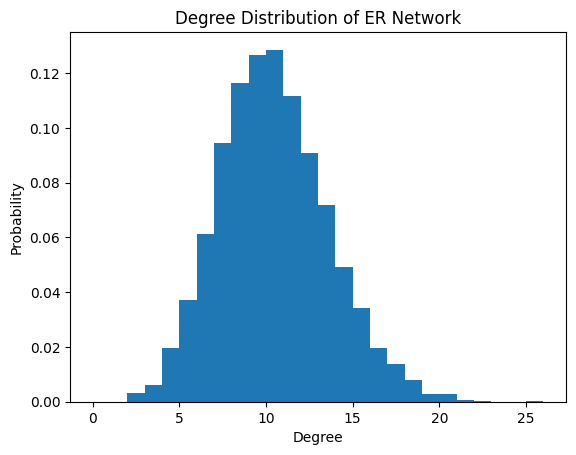

In [8]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 5000 
p = 0.002

# Create graph
G1 = nx.erdos_renyi_graph(N, p)

# Get degree distribution
degree_sequence = [d for n, d in G1.degree()]

# Plot the degree distribution
hist, edges = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2), density=True)

plt.bar(edges[:-1], hist, width=1.0, align='edge')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution of ER Network')
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.



The probability of a link is:  0.001
(a) The expected number of links is:  4498.5
(c) The probability p_c where the network is at the critical point is:  0.0003
(d) The number of nodes such that the network has only one component is:  9119.0
(e) The average degree is:  9.118 , The average distance is:  4.125
The degree distribution is plotted: 


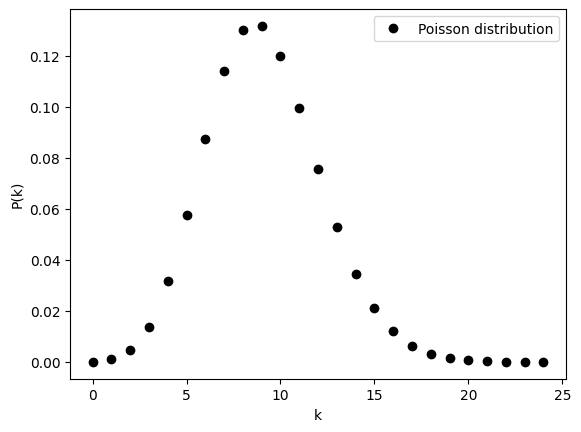

In [9]:
N = 3000
p = 1e-3
print("The probability of a link is: ", p)

# a) Calculate expected number of links
L = p*N*(N-1)/2 # eq. 3.2
print("(a) The expected number of links is: ", L)

# b) The network is part of the supercritical regime since <k> > 1

# c) Calculate the critical probability
p_c = 1/N

# print with 4 decimals
print("(c) The probability p_c where the network is at the critical point is: ", round(p_c, 4))

# d) Calculate the critical number of nodes such that the network only has one component
N_test = np.linspace(N,10000,10000)

# Calculate when ln(N)/N is larger than p
N_g = np.log(N_test)/N_test
# find first number where N_test smaller than p
N_cr = np.ceil(N_test[np.where(N_g < p)[0][0]])
print("(d) The number of nodes such that the network has only one component is: ", N_cr)

# Plot the graph
#plt.plot(N_test, N_g, label='ln(N)/N')
#plt.axhline(y=p, color='r', linestyle='--', label='p')
#plt.plot(N_cr, p, 'o', color='black', label='N_cr') # plot Ncr as a circle
#plt.xlabel('N')
#plt.ylabel('ln(N)/N')
#plt.legend()
#plt.show()


k_cr = (N_cr-1)*p # eq. 3.3
# Calculate average distance
d = np.log(N_cr)/np.log(k_cr) # eq 3.19
print("(e) The average degree is: ", k_cr,",", "The average distance is: ", round(d,3))

# Calculate degree distribution by aproximating with a poisson distribution eq: 3.8
def poisson(k, k_cr):
    return np.exp(-k_cr)*(k_cr**k)/math.factorial(k)

# Plot the degree distribution
print("The degree distribution is plotted: ")
k = np.arange(0, 25, 1)
p_k = np.zeros(len(k))
for i in range(len(k)):
    p_k[i] = poisson(k[i], k_cr)

plt.plot(k, p_k, 'o', color='black', label='Poisson distribution')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend()
plt.show()

#print("(f) The probability of a node having degree "+  str(k_cr)+ " is: ", round(p_k,3))

In the figure above the degree distribution is given as
\begin{equation}
    p_k = e^{-k_{cr}} \frac{k_{cr}^{k}}{k!} = e^{-9.118} \frac{(-9.118)^{k}}{k!}
\end{equation}

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

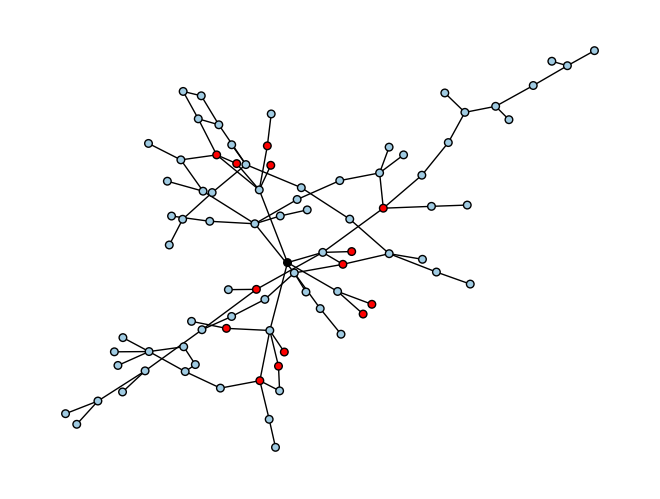

In [10]:
# plot random network with 200 nodes and average degree 1.5
avg_degree = 1.5
n_nodes = 200
p = avg_degree/(n_nodes-1) # eq 3.3

# Create erdos renyi (random) graph
G = nx.erdos_renyi_graph(n_nodes, p)

# extract giant component
Gcc = sorted(list(nx.connected_components(G)), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# choose 1 random node
rand_node = random.choice(list(G0.nodes()))

# find all nodes that are 2 steps away from the random node
nodes = nx.single_source_shortest_path_length(G0, rand_node, cutoff = 2)

# Keep only nodes with distance 2 from the random node
nodes = [n for n in nodes if nodes[n] == 2]

# Set the color of nodes
node_color = ["black" if n == rand_node else '#ff0000' if n in nodes else "#A0CBE2" for n in G0.nodes()]

# Draw the graph
nx.draw(G0,node_size =  30, node_color = node_color, edgecolors = "black")

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

part 1

Average shortest path length for G1:  62.875751503006015
Average shortest path length for G2:  7.749362725450902
Average shortest path length for G3:  4.722052104208417


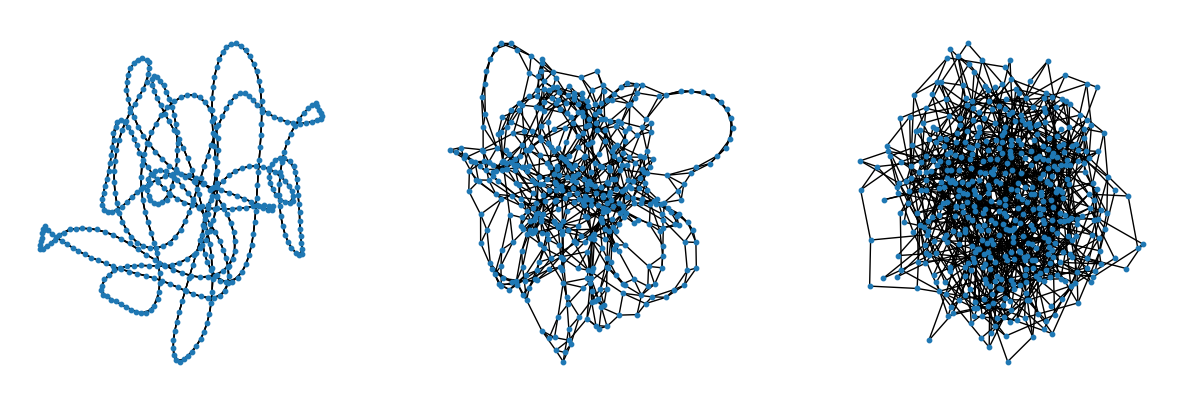

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

#Generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0, 0.1, and 1
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

#Plot my graphs
plt.figure(figsize=(15, 5))
plt.subplot(131)
nx.draw(G1, node_size=10)
plt.subplot(132)
nx.draw(G2, node_size=10)
plt.subplot(133)
nx.draw(G3, node_size=10)

#Calculate the average shortest path length ⟨d⟩ for each one.
print("Average shortest path length for G1: ", nx.average_shortest_path_length(G1))
print("Average shortest path length for G2: ", nx.average_shortest_path_length(G2))
print("Average shortest path length for G3: ", nx.average_shortest_path_length(G3))

When setting p = 1 you remove all edges and then add new edges randomly.
In that way you get a completely random network with no clustering as seen on the network to the right.

Part 2

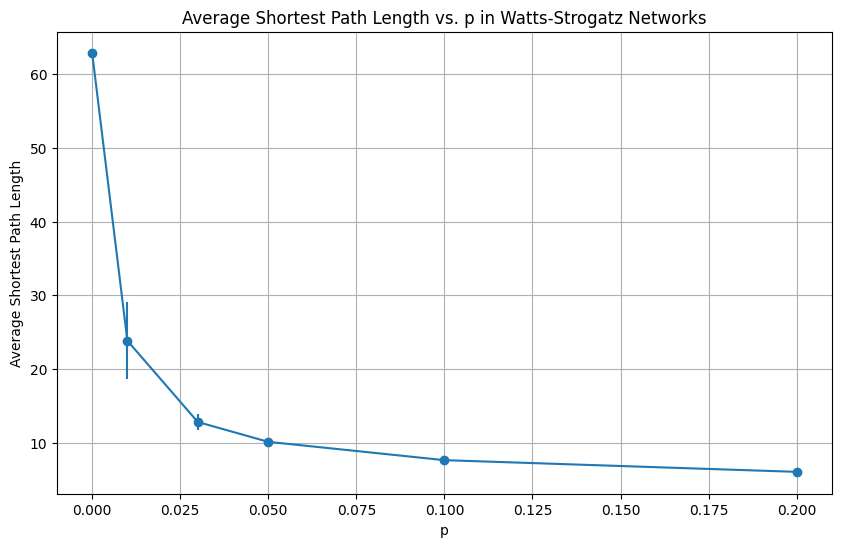

In [12]:
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
num_networks = 50

avg_shortest_paths = []
std_devs = []

for p in p_values:
    avg_shortest_paths_p = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_shortest_path = nx.average_shortest_path_length(G)
        avg_shortest_paths_p.append(avg_shortest_path)
    avg_shortest_paths.append(np.mean(avg_shortest_paths_p))
    std_devs.append(np.std(avg_shortest_paths_p))

plt.figure(figsize=(10, 6))
plt.errorbar(p_values, avg_shortest_paths, yerr=std_devs, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs. p in Watts-Strogatz Networks')
plt.grid(True)
plt.show()

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

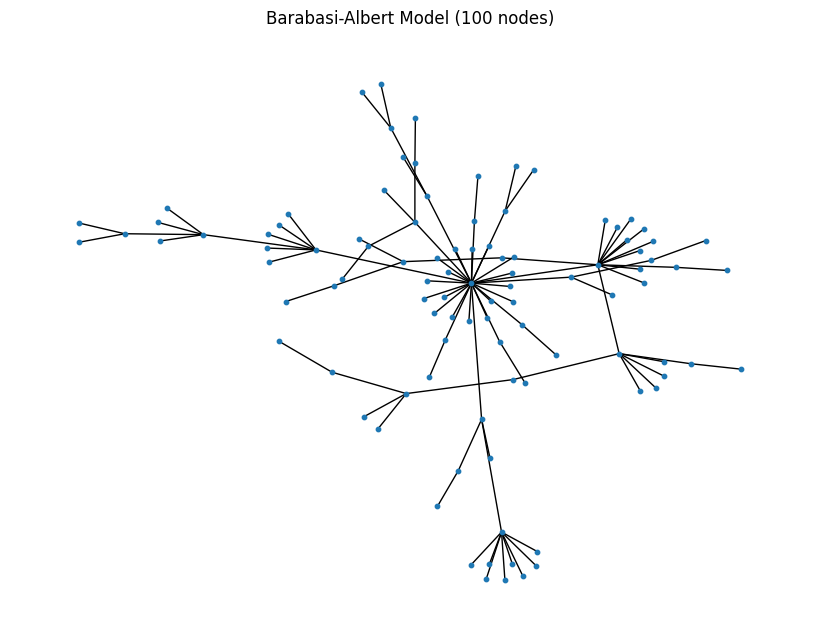

In [13]:
G_100 = nx.Graph()
G_100.add_edge(0, 1)

num_nodes = 100

for i in range(2, num_nodes):
    # Generate a list of all edges, flatten it, and select a node based on degree.
    edges = list(G_100.edges())
    nodes = [node for edge in edges for node in edge]
    selected_node = random.choice(nodes)
    G_100.add_edge(i, selected_node)

plt.figure(figsize=(8, 6))
nx.draw(G_100, with_labels=False, node_size=10)
plt.title("Barabasi-Albert Model (100 nodes)")
plt.show()

Part 2

Maximum Degree: 26
Minimum Degree: 1


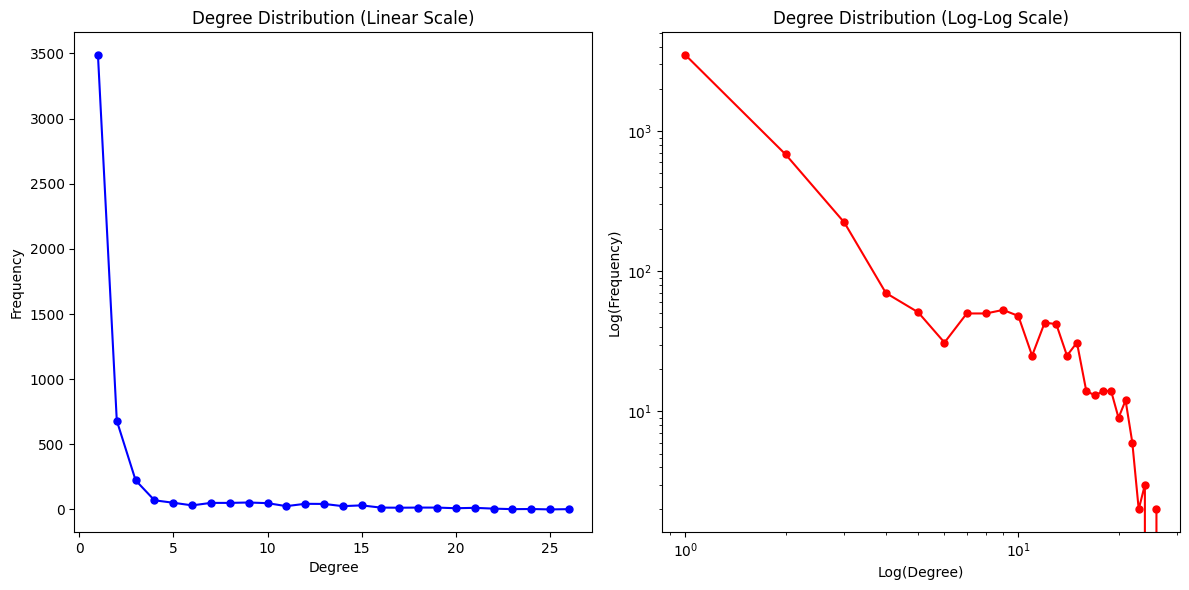

In [14]:
num_nodes = 5000

for i in range(100, num_nodes):
    edges = list(G.edges())
    nodes = [node for edge in edges for node in edge]
    selected_node = random.choice(nodes)
    G.add_edge(i, selected_node)

degrees = dict(G.degree())
max_degree = max(degrees.values())
min_degree = min(degrees.values())
print(f"Maximum Degree: {max_degree}")
print(f"Minimum Degree: {min_degree}")

degree_values = list(degrees.values())
degree_hist, bins = np.histogram(degree_values, bins=range(min_degree, max_degree + 2))

plt.figure(figsize=(12, 6))

# Linear scale plot
plt.subplot(121)
plt.plot(bins[:-1], degree_hist, 'bo-', markersize=5)
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Log-log scale plot
plt.subplot(122)
plt.loglog(bins[:-1], degree_hist, 'ro-', markersize=5)
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')

plt.tight_layout()
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

Part 1

In [15]:
num_iterations = 1000
paradox_count = 0

for _ in range(num_iterations):
    # Pick a random node
    random_node = random.choice(list(G.nodes()))
    node_degree = G.degree(random_node)
    
    # Find neighbors and calculate their average degree
    neighbors = list(G.neighbors(random_node))
    if len(neighbors) > 0:
        neighbors_avg_degree = np.mean([G.degree(neighbor) for neighbor in neighbors])
        
        # Check if the Friendship Paradox is true
        if neighbors_avg_degree > node_degree:
            paradox_count += 1

# Calculate the fraction of times the paradox is true
fraction_true_paradox = paradox_count / num_iterations
print(f"Fraction of times the Friendship Paradox is true: {fraction_true_paradox}")


#Create an ER network with the same size (5000 nodes) and the same probability "p" as in the BA network:

p = 2 * len(G.edges()) / (len(G.nodes()) * (len(G.nodes()) - 1))  # Calculate the equivalent p for ER
ER_network = nx.erdos_renyi_graph(len(G.nodes()), p)

#Compare the BA and ER networks by examining their degree distributions and the number of connected components:
# Degree distribution comparison
degree_hist_BA = np.array(list(dict(G.degree()).values()))
degree_hist_ER = np.array(list(dict(ER_network.degree()).values()))

print(f"BA Network Mean Degree: {degree_hist_BA.mean()}")
print(f"ER Network Mean Degree: {degree_hist_ER.mean()}")

# Number of connected components comparison
components_BA = list(nx.connected_components(G))
components_ER = list(nx.connected_components(ER_network))

print(f"Number of Connected Components in BA Network: {len(components_BA)}")
print(f"Number of Connected Components in ER Network: {len(components_ER)}")

Fraction of times the Friendship Paradox is true: 0.847
BA Network Mean Degree: 2.3592
ER Network Mean Degree: 2.3872
Number of Connected Components in BA Network: 1
Number of Connected Components in ER Network: 529


Part 2

The difference between the 2 networks is that BA i weighted towards nodes with high degree. This means that the network is more clustered and has a higher average degree. Everything is connected to "hubs".
The ER network is more random and has a lower average degree.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

### Part 1:

In [18]:
def configuration_model (degrees) :
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    for idx, d in enumerate(degrees):
        for i in range(d):
            halfedges.append(idx)

    # Shuffle the list halfedges
    np.random.shuffle(halfedges)
    
    # Append the resulting edges to the list `edgelist` as tuples, [that is, append (i,j) if i and j should be connected by and edge]
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
   
    for i in range(0, len(halfedges),2):
        if i < len(halfedges)-1:
            edgelist.append((halfedges[i], halfedges[i+1]))
        else:
            edgelist.append((halfedges[i], halfedges[0])) 

    return edgelist #Return list of tuples indicating edges
        

### part 2

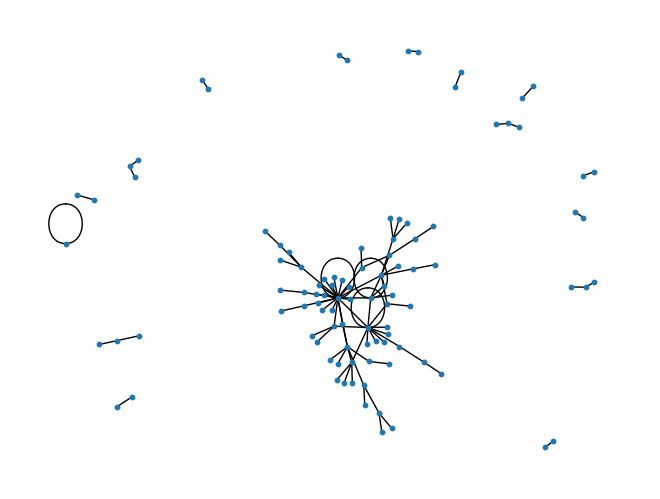

In [23]:
# Extract degree sequence from part 4
degree_sequence = [d for n, d in G_100.degree()]

edgelist = configuration_model(degree_sequence)
# creates nodes and edges from edgelist
G = nx.Graph(edgelist)
# plot the graph with labels
nx.draw(G, node_size=10)
plt.show()

In the configuration network we observe that the network consists of multiple clusters and that the nodes are not all connected to hubs. This is due to the random assignment of edges. In the BA network nodes are connected to hubs as the probability of connecting to a node is proportional to the degree of the node as mentioned earlier.

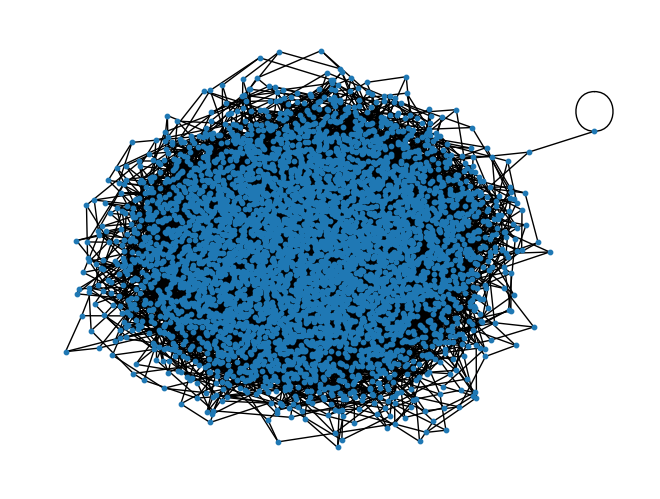

In [26]:
nodes = 5000
degrees = [3]*int(nodes/2) + [5]*int(nodes/2)

# create configuration model
edgelist = configuration_model(degrees)
# creates nodes and edges from edgelist
G = nx.Graph(edgelist)
#nx.draw(G, node_size=10)

In [32]:
# sum of all degrees
sum_degrees = sum(degrees)
print("The sum of all degrees is: ", sum_degrees)

# find sum of degrees in resulting network
network_degrees = [d for n, d in G.degree()]
sum_network_degrees = sum(network_degrees)
print("The sum of all degrees in the network is: ", sum_network_degrees)

The sum of all degrees is:  20000
The sum of all degrees in the network is:  19992


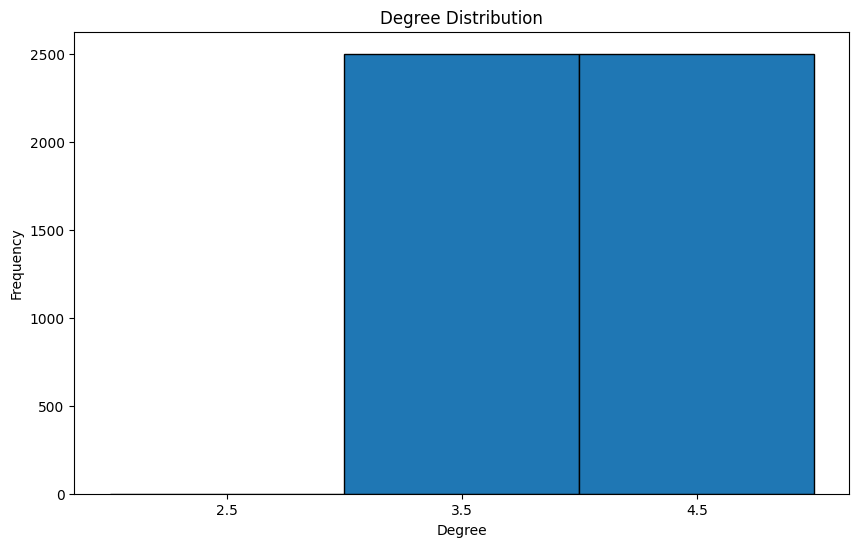

In [62]:
# plot barplot of degrees
plt.figure(figsize=(10, 6))
x = np.arange(2, 6, 1)

bins = np.histogram(network_degrees, bins=x)[1]
bin_centers = 0.5 * np.diff(bins) + bins[:-1]

plt.hist(network_degrees, bins=x, edgecolor='black')

plt.xticks(bin_centers)
plt.xlabel('Degree') 
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()



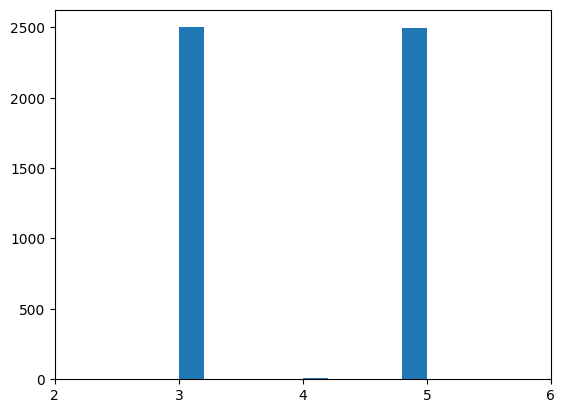

In [71]:
# create the histogram
plt.hist(network_degrees, align='mid') # `align='left'` is used to center the labels

# now, define the ticks (i.e. locations where the labels will be plotted)
xticks = [i for i in range(2,7)]

# also define the labels we'll use (note this MUST have the same size as `xticks`!)
#xtick_labels = ['Family-%d' % (f+1) for f in range(NUM_FAMILIES)]

# add the ticks and labels to the plot
plt.xticks(xticks)

plt.show()